<h1>Questions to be handed in for project 6:</h1>

<p>To get started, we load <code>Plots</code> so that we can make plots and the <code>Roots</code> package for later usage.</p>

In [ ]:
using Plots
using Roots

<hr />

<h3>Quick background</h3>

<p>Read about this material here: <a href="http://mth229.github.io/derivatives.html">Approximate derivatives in julia</a>.</p>

<p>For the impatient, the slope of the tangent line to the graph of $f(x)$ at the point $(c,f(c))$ is given by the following limit:</p>


$$
\lim_{h \rightarrow 0} \frac{f(c + h) - f(c)}{h}.
$$


<p>The notation for this – when the limit exists – is $f'(c)$, the intuition is that this is the limit of the slope of a sequence of secant lines connecting the points $(c, f(c))$ and $(c+h, f(c+h))$. In general the derivative of a function $f(x)$ is the function $f'(x)$, which returns the slope of the tangent line for each $x$ where it is defined.</p>

<h4>Approximate derivatives</h4>

<p>Approximating the slope of the tangent line can be done <a href="XXX">several ways</a>. The <em>forward difference quotient</em> takes a small value of $h$ and uses the values $(f(x+h) - f(x))/h$ as an approximation.</p>

<p>For example to estimate the derivative of $x^x$ at $c=1$ with <code>h&#61;1e-6</code> we could have</p>

In [ ]:
f(x) = x^x
c, h = 1, 1e-6
(f(c+h) - f(c))/h

1.000001000006634

<p>In <code>julia</code> we can write a function that does this, allowing us to pass in any function:</p>

In [ ]:
forward(f, c; h=1e-6) = (f(c+h) - f(c))/h

forward (generic function with 1 method)

<p>We can define an <em>operator</em> – something which takes a function and returns a function modifying the above slightly:</p>

In [ ]:
Df(f; h=1e-6) = x -> forward(f,x,h=h)

Df (generic function with 1 method)

<h4>Automatic derivatives</h4>

<p>In the <code>Roots</code> package, an operator <code>D</code> (using Euler's notation) is given which uses a numeric approach to compute the derivative. This is more accurate, but conceptually a bit more difficult to understand and does not work for all functions. It is also used like an operator, e.g., <code>D&#40;f&#41;</code> is a function derived from the function <code>f</code>:</p>

In [ ]:
using Roots
fp(x) = D(sin)(x)		# define a function fp or use D(sin) directly
fp(pi)			        # finds cos(pi). Also D(sin)(pi)

-1.0

<p>The usual notation for a deriviative can be defined, though it isn't the default. If we use this command (ignoring the warning):</p>

In [ ]:
Base.ctranspose(f::Function) = D(f)

ctranspose (generic function with 36 methods)

<p>then, we can differentiate using the "usual" notation:</p>

In [ ]:
f(x) = sin(x)
f'(pi)     # same as D(f)(pi)
f''(pi)    # same as D(f,2)(pi)

-1.2246467991473532e-16

<h4>Symbolic derivatives</h4>

<p>The <code>D</code> function gives accurate numeric values for first, second, and even higher-order derivatives. It does not however, return the expression one would get were these computed by hand. The <code>diff</code> function from <code>SymPy</code> will find symbolic derivatives, similar to what is achieved when differentiating "by hand."</p>

<p>The <code>diff</code> function can be called with a function:</p>

In [ ]:
using SymPy
f(x) = exp(x) * sin(x)
diff(f)

<p>It can also be called with a symbolic expression:</p>

In [ ]:
x, a = symbols("x, a")

(x,a)

In [ ]:
@vars x a

In [ ]:
diff(x * sin(x))

<p>If there is another symbol, then a second argument is passed to specify which one is being having its derivative taken:</p>

In [ ]:
diff(x*sin(a*x), x)

<h3>Questions</h3>

<ul>
<li>Calculate the slope of the secant line of $f(x) = 3x^2 + 5$ between   $(3,f(3))$ and $(4, f(4))$.</li>
</ul>

<ul>
<li>Verify that the derivative of $f(x) = \sin(x)$ at $\pi/3$ is $1/2$   by finding the following limit using a table:</li>
</ul>


$$
\lim_{h \rightarrow 0} \frac{f(\pi/3 + h) - f(\pi/3)}{h}
$$


<p>(Use <code>&#91;hs ys&#93;</code> to look at your generated data, as was done in the limits project.)</p>

<ul>
<li>Let $f(x) = 1/x$ and $c=2$. Find the approximate derivative (forward) when   <code>h&#61;1e-6</code>.</li>
</ul>

<ul>
<li>Let $f(x) = x^x$ and $c=3$. Find the approximate derivative   (forward) when <code>h&#61;1e-8</code>.</li>
</ul>

<ul>
<li>Let $f(x) = (x + 2)/(1 + x^3)$. Plot both $f$ and its approximate   derivative on the interval $[0,5]$. Identify the zero of the   derivative. What is its value? What is the value of $f(x)$ at this   point?</li>
</ul>

<p>What commands produce the plot?</p>

<p>What is the zero of the derivative on this interval?</p>

<p>What is the value of $f$ at this point:</p>

<ul>
<li>Let $f(x) = (x^3 + 5)(x^3 + x + 1)$. The derivative of this function   has one real zero. Find it. (You can use <code>fzero</code> with the derivative   function after plotting to identify a bracketing interval.)</li>
</ul>

<ul>
<li>Let $f(x) = \sin(x)$. Following the example on p124 of the Rogawski   book we look at a table of values of the forward difference equation   at $x=\pi/6$ for various values of $h$. The true derivative is   $\cos(\pi/6) = \sqrt{3}/2$.</li>
</ul>

<p>Make the following table. </p>

In [ ]:
f(x) = sin(x)
c = pi/6
hs = [(1/10)^i for i in 1:12]
ys = [forward(f, c, h=h) for h in hs] - sqrt(3)/2
[hs ys]

12x2 Array{Any,2}:
 0.1      -0.0264218  
 0.01     -0.00251441 
 0.001    -0.000250144
 0.0001   -2.50014e-5 
 1.0e-5   -2.50002e-6 
 1.0e-6   -2.49917e-7 
 1.0e-7   -2.51525e-8 
 1.0e-8   -2.39297e-9 
 1.0e-9    1.42604e-8 
 1.0e-10   1.80794e-7 
 1.0e-11  -1.48454e-6 
 1.0e-12   4.06657e-6 

<p>What size <code>h</code> has the closest approximation?</p>

<ul>
<li>The <code>D</code> operator is easy to use. Here is how we can plot both the   sine function and its derivative</li>
</ul>

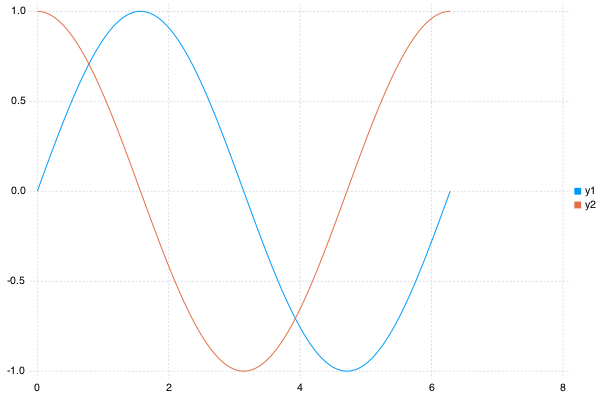

In [ ]:
using Plots, Roots			# to load plot and D
f(x) = sin(x)
plot([f, D(f)], 0, 2pi)     # or plot(f, 0, 2pi); plot!(D(f), 0, 2pi)

<p>(If you defined the <code>&#39;</code> notation to work, then it is even easier: <code>plot&#40;&#91;f,f&#39;&#93;, 0, 2pi&#41;</code>.)</p>

<p>Make a plot of $f(x) = \log(x+1) - x + x^2/2$ and its derivative over the interval $[-3/4, 4]$. The commands are:</p>

<p>Is the derivative always increasing?</p>

<ul>
<li>The function $f(x) = x^x$ has a derivative for $x > 0$. Use <code>fzero</code>   to find a zero of its derivative. What is the value of the zero?</li>
</ul>

<ul>
<li>Using the <code>diff</code> function from the <code>SymPy</code> package, identify the proper derivative of $x^x$:</li>
</ul>

<ul>
<li>Using the <code>diff</code> function, find the derivative of the inverse tangent, $\tan^{-1}(x)$ (<code>atan</code>). What is the function?</li>
</ul>

<h2>Some applications</h2>

<ul>
<li>Suppose the height of a ball falls according to the formula $h(t) =   300 - 16t^2$. Find the rate of change of height at the instant the   ball hits the ground.</li>
</ul>

<ul>
<li>A formula for blood alcohol level in the body based on time is based   on the number of drinks and the time   <a href="http://en.wikipedia.org/wiki/Blood_alcohol_content">wikipedia</a>.</li>
</ul>

<p>Suppose a model for the number of drinks consumed per hour is </p>

In [ ]:
n(t) = t <= 3 ? 2 * sqrt(3) * sqrt(t) : 6.0

n (generic function with 1 method)

<p>Then the BAL for a 175 pound male is given by</p>

In [ ]:
bal(t) = (0.806 * 1.2 * n(t)) / (0.58 * 175 / 2.2) - 0.017*t

bal (generic function with 1 method)

<p>From the plot below, describe when the peak blood alcohol level occurs and is the person ever in danger of being above 0.10?</p>

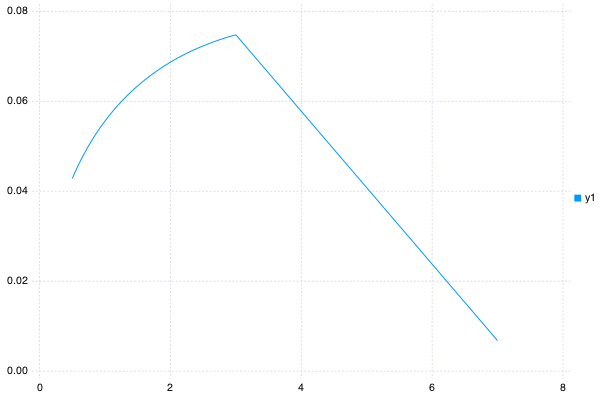

In [ ]:
plot(bal, .5,7)

<ul>
<li>Plot the derivative of <code>bal</code> over the time $[0.5, 7]$.  Is this function ever positive?</li>
</ul>

<h3>Tangent lines</h3>

<p>The tangent line to the graph of $f(x)$ at $x=c$ is given by $y = f(c) + f'(c)(x-c)$. It is fairly easy to plot both the function and its tangent line – we just need a function to compute the tangent line.</p>

<p>Here we write an operator to return such a function.  The operator needs to know both the function name and the value $c$ to find the tangent line at $(c, f(c))$ (notice the <code>x-&gt;</code> bit indicating the following returns a  function):</p>

In [ ]:
tangent(f, c) = x -> f(c) + f'(c)*(x-c) # returns a function

tangent (generic function with 1 method)

<p>Here we see how to use it:</p>

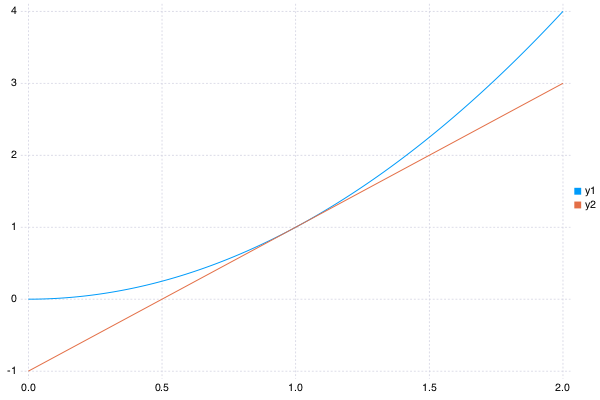

In [ ]:
f(x) = x^2			# replace me
plot([f, tangent(f, 1)], 0, 2)   # or plot(f, 0, 2); plot!(tangent(f, 1), 0, 2)

<ul>
<li>For the function $f(x) = 1/(x^2 + 1)$ (The witch of Agnesi), graph   $f$ over the interval $[-3,3]$ and the tangent line to $f$ at $x=1$.</li>
</ul>

<ul>
<li>Let $f(x) = x^3 -2x - 5$. Find the intersection of the tangent line   at $x=3$ with the $x$-axis.</li>
</ul>

<ul>
<li>Let $f(x)$ be given by the expression below. </li>
</ul>

In [ ]:
f(x; a=1) = a * log((a + sqrt(a^2 - x^2))/x ) - sqrt(a^2 - x^2)

f (generic function with 1 method)

<p>The value of <code>a</code> is a parameter, the default value of $a=1$ is fine.</p>

<p>For $x=0.25$ and $x=0.75$ the tangent lines can be drawn with</p>

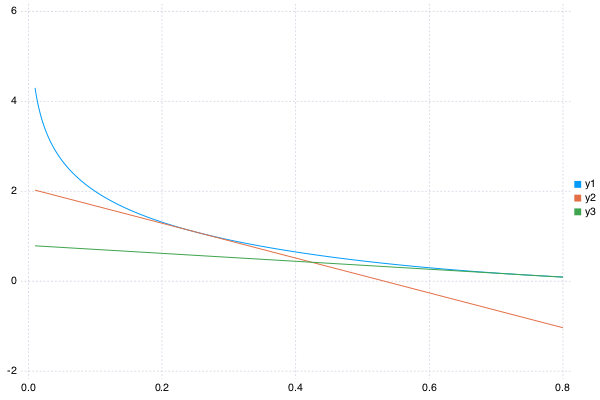

In [ ]:
plot([f, tangent(f, 0.25), tangent(f, 0.75)], 0.01, 0.8)

<p>Verify that the length of the tangent line between $(c, f(c))$ and the $y$ axis is the same for $c=0.25$ and $c=0.75$. (For any $c$, the distance formula can be used to find the distance between the point $(c, f(c))$ and $(0, y_0)$ where, $y_0$ is where the tangent line at $c$ crosses the $y$ axis.)</p>

<h4>Higher-order derivatives</h4>

<p>Higher-order derivates can be approximated as well. For example, one can use <code>D&#40;f,2&#41;</code> <em>or</em>, if defined, <code>f&#39;&#39;</code> to approximate the second derivative.</p>

<ul>
<li>Find the second derivative of $f(x) = \sqrt{x \cdot exp(x)}$ at $c=3$.</li>
</ul>

<ul>
<li>Find the zeros in $[0, 10]$ of the second derivative of the function $f(x) = \sin(2x) + 3\sin(4x)$ using <code>fzeros</code>.</li>
</ul>